In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

#Import time & datetime module.
import time
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7de56bf7736fce48d56dad3b77b832c9


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | muzhi
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | ndola
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | sataua
City not found. Skipping...
Processing Record 11 of Set 1 | togur
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | caucaia
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | pangkalanbuun
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | arawa
Processing Record 21 of Set 1 | goundam
Processing Record 22

Processing Record 39 of Set 4 | ati
Processing Record 40 of Set 4 | goderich
Processing Record 41 of Set 4 | biskamzha
Processing Record 42 of Set 4 | udaipura
Processing Record 43 of Set 4 | el dorado
Processing Record 44 of Set 4 | timaru
Processing Record 45 of Set 4 | cockburn town
Processing Record 46 of Set 4 | varhaug
Processing Record 47 of Set 4 | san luis
Processing Record 48 of Set 4 | kerema
Processing Record 49 of Set 4 | pucara
Processing Record 50 of Set 4 | saleaula
City not found. Skipping...
Processing Record 1 of Set 5 | butembo
Processing Record 2 of Set 5 | bur gabo
City not found. Skipping...
Processing Record 3 of Set 5 | castro
Processing Record 4 of Set 5 | ust-omchug
Processing Record 5 of Set 5 | jasper
Processing Record 6 of Set 5 | flinders
Processing Record 7 of Set 5 | torbay
Processing Record 8 of Set 5 | doka
Processing Record 9 of Set 5 | wicklow
Processing Record 10 of Set 5 | kirakira
Processing Record 11 of Set 5 | kamenskoye
City not found. Skippin

Processing Record 32 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 33 of Set 8 | ambon
Processing Record 34 of Set 8 | pierre
Processing Record 35 of Set 8 | tucuman
Processing Record 36 of Set 8 | ewa beach
Processing Record 37 of Set 8 | ilulissat
Processing Record 38 of Set 8 | felidhoo
City not found. Skipping...
Processing Record 39 of Set 8 | amparafaravola
Processing Record 40 of Set 8 | porto uniao
Processing Record 41 of Set 8 | amahai
Processing Record 42 of Set 8 | la ronge
Processing Record 43 of Set 8 | bururi
Processing Record 44 of Set 8 | pingliang
Processing Record 45 of Set 8 | mantes-la-jolie
Processing Record 46 of Set 8 | mancio lima
Processing Record 47 of Set 8 | thunder bay
Processing Record 48 of Set 8 | kalulushi
Processing Record 49 of Set 8 | amderma
City not found. Skipping...
Processing Record 50 of Set 8 | kuito
Processing Record 1 of Set 9 | paracho
City not found. Skipping...
Processing Record 2 of Set 9 | kupang
Processing Record 3 

Processing Record 18 of Set 12 | husavik
Processing Record 19 of Set 12 | gizo
Processing Record 20 of Set 12 | thanh hoa
Processing Record 21 of Set 12 | luebo
Processing Record 22 of Set 12 | shaoyang
Processing Record 23 of Set 12 | bitung
Processing Record 24 of Set 12 | bukama
Processing Record 25 of Set 12 | tual
Processing Record 26 of Set 12 | chickasha
Processing Record 27 of Set 12 | nagai
Processing Record 28 of Set 12 | ushirombo
Processing Record 29 of Set 12 | kashi
Processing Record 30 of Set 12 | mahibadhoo
Processing Record 31 of Set 12 | takoradi
Processing Record 32 of Set 12 | seminole
Processing Record 33 of Set 12 | goulburn
Processing Record 34 of Set 12 | rio gallegos
Processing Record 35 of Set 12 | san vicente
Processing Record 36 of Set 12 | sherbakul
Processing Record 37 of Set 12 | saldanha
Processing Record 38 of Set 12 | salalah
Processing Record 39 of Set 12 | nieuw amsterdam
Processing Record 40 of Set 12 | otanche
Processing Record 41 of Set 12 | marga

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.2817,169.8464,48.07,68,96,6.11,NZ,2022-04-06 21:27:35
1,Muzhi,65.3667,64.6667,16.56,78,100,21.45,RU,2022-04-06 21:27:36
2,Mataura,-46.1927,168.8643,44.78,88,93,2.51,NZ,2022-04-06 21:27:36
3,Punta Arenas,-53.1500,-70.9167,46.51,53,0,11.50,CL,2022-04-06 21:27:36
4,Arraial Do Cabo,-22.9661,-42.0278,75.16,94,75,14.97,BR,2022-04-06 21:27:37
5,Bambous Virieux,-20.3428,57.7575,77.25,83,40,6.91,MU,2022-04-06 21:27:37
6,Ndola,-12.9587,28.6366,63.12,98,100,3.02,ZM,2022-04-06 21:27:37
7,Barrow,71.2906,-156.7887,-11.18,70,0,8.05,US,2022-04-06 21:27:38
8,Togur,58.3631,82.8265,30.25,83,76,13.06,RU,2022-04-06 21:27:38
9,Bredasdorp,-34.5322,20.0403,58.21,59,100,11.63,ZA,2022-04-06 21:26:21


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

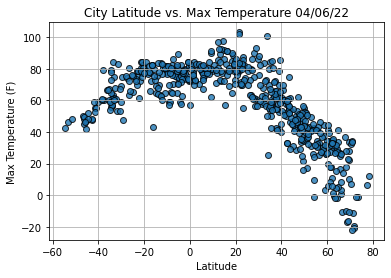

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

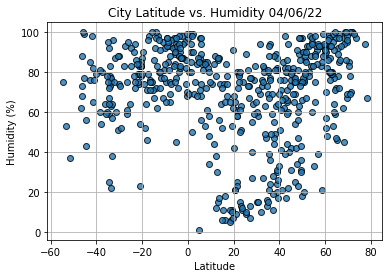

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

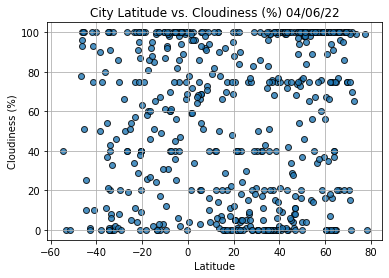

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

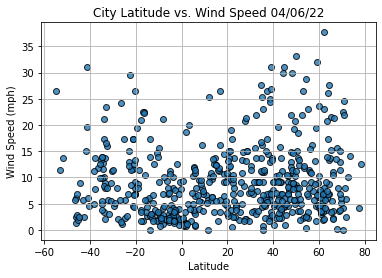

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                       Bethel
Lat                       41.3712
Lng                       -73.414
Max Temp                    52.02
Humidity                       85
Cloudiness                    100
Wind Speed                  10.36
Country                        US
Date          2022-04-06 21:27:39
Name: 13, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Muzhi,65.3667,64.6667,16.56,78,100,21.45,RU,2022-04-06 21:27:36
7,Barrow,71.2906,-156.7887,-11.18,70,0,8.05,US,2022-04-06 21:27:38
8,Togur,58.3631,82.8265,30.25,83,76,13.06,RU,2022-04-06 21:27:38
13,Bethel,41.3712,-73.4140,52.02,85,100,10.36,US,2022-04-06 21:27:39
18,Goundam,16.4145,-3.6708,91.13,6,29,11.30,ML,2022-04-06 21:27:40


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

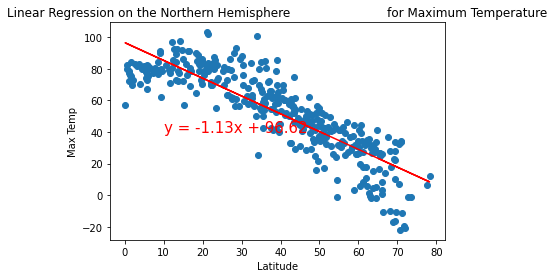

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

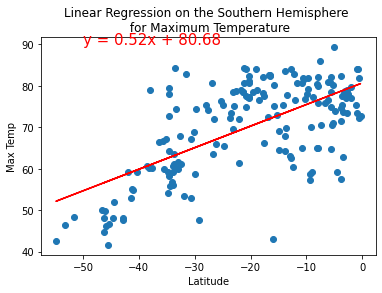

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

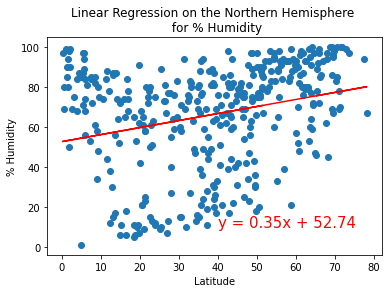

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

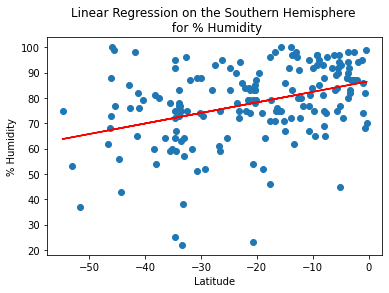

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

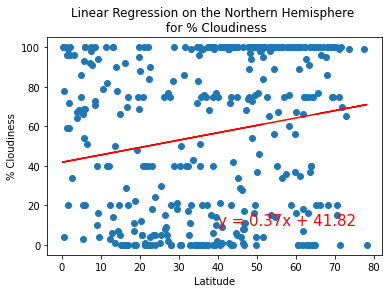

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

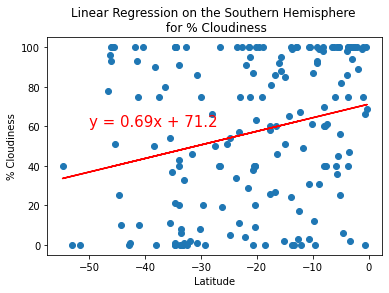

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

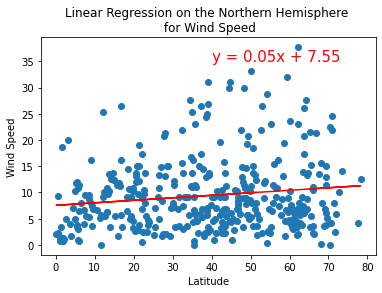

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

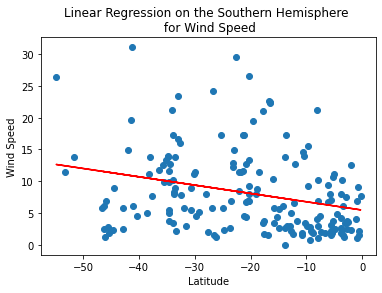

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))